# Исследование прибыльности тарифов компании «Мегалайн»

Компания «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. Представлены данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

Описание тарифов
Тариф «Смарт»
1.	Ежемесячная плата: 550 рублей
2.	Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета:
  -	минута разговора: 3 рубля
  -	сообщение: 3 рубля
  -	1 Гб интернет-трафика: 200 рублей

Тариф «Ультра»
1.	Ежемесячная плата: 1950 рублей
2.	Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета:
  -	минута разговора: 1 рубль
  -	сообщение: 1 рубль
  -	1 Гб интернет-трафика: 150 рублей

Примечание:
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

**Цель исследования**: проверка гипотез и определние более прибыльного тарифа
-	средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
-	средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

**Ход исследования**:
Данные представлены в 5 таблицах: calls.csv, internet.csv, messages.csv, tariffs.csv, users.csv.
О качестве данных ничего не известно, поэтому потребуется предобработка данных.

Исследование пройдет в 5 этапов:
- обзор данных;
- предобработка данных;
- добавление необходимой информации;
- анализ данных;
- проверка гипотез


<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-аномалий" data-toc-modified-id="Обработка-аномалий-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обработка аномалий</a></span></li><li><span><a href="#Обработка-дубликатов" data-toc-modified-id="Обработка-дубликатов-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обработка дубликатов</a></span></li><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Изменение типов данных</a></span></li></ul></li><li><span><a href="#Добавление-информации-в-таблицы" data-toc-modified-id="Добавление-информации-в-таблицы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Добавление информации в таблицы</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Итоги-исследования" data-toc-modified-id="Итоги-исследования-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Итоги исследования</a></span></li></ul></div>

## Обзор данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy import stats as st

In [2]:
#Загружаем датасеты и сохраняем их в переменные calls, internet, messages, tariffs, users

try:
    real_estate = pd.read_csv('C:/Users/Anna/Desktop/Обучение/Яндекс практикум/Проект 3/real_estate_data.csv', sep='\t') 

except FileNotFoundError:
    real_estate = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
    
    
calls = pd.read_csv('C:/Users/Anna/Desktop/Обучение/Яндекс практикум/Проект 4/calls.csv')
internet = pd.read_csv('C:/Users/Anna/Desktop/Обучение/Яндекс практикум/Проект 4/internet.csv')
messages = pd.read_csv('C:/Users/Anna/Desktop/Обучение/Яндекс практикум/Проект 4/messages.csv')
tariffs = pd.read_csv('C:/Users/Anna/Desktop/Обучение/Яндекс практикум/Проект 4/tariffs.csv')
users = pd.read_csv('C:/Users/Anna/Desktop/Обучение/Яндекс практикум/Проект 4/users.csv')

Данные представлены в 5 таблицах. Для ускорения работы с обзором данных напишем функцию, которая будет принимать в качестве аргумента название таблицы, а выводить данные необходимые для обзора.

In [3]:
#Создаем функцию для обзора данных 
def info_table(table):
    display(table.head(5))
    print(table.info())
    display(table.describe())

In [4]:
#Применяем функцию к переменной users
info_table(users)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


В таблице users 8 колонок, 500 строк, тип данных int64, object.

Согласно документации к таблице users (информация о пользователях):
- `user_id` — уникальный идентификатор пользователя
- `first_name` — имя пользователя
- `last_name` — фамилия пользователя
- `age` — возраст пользователя (годы)
- `reg_date` — дата подключения тарифа (день, месяц, год)
- `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- `city` — город проживания пользователя
- `tariff` — название тарифного плана

Пропущенные значения присутствуют только в столбце `churn_date`, но заполнение их не требуется, т.к. согласно документации, если значение пропущено, то тариф ещё действовал на момент выгрузки данных.

In [5]:
#Применяем функцию к переменной calls
info_table(calls)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None


,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


В таблице calls 4 колонки, 202607 строк, тип данных object, float64, int64.

Согласно документации к таблице calls (информация о звонках):
- `id` — уникальный номер звонка
- `call_date` — дата звонка
- `duration` — длительность звонка в минутах
- `user_id` — идентификатор пользователя, сделавшего звонок

В таблице отсутствуют пропущенные значения.

In [6]:
#Применяем функцию к переменной messages
info_table(messages)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None


,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


В таблице messages 3 колонки, 123036 строк, тип данных object, int64.

Согласно документации к таблице  messages (информация о сообщениях):
- `id` — уникальный номер сообщения
- `message_date` — дата сообщения
- `user_id` — идентификатор пользователя, отправившего сообщение

В таблице отстутствуют пропущенные значения.

In [7]:
#Применяем функцию к переменной internet
info_table(internet)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None


,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


В таблице internet 5 колонок, 149396 строк, тип данных object, int64, float64.

Согласно документации к таблице internet (информация об интернет-сессиях):
- `id` — уникальный номер сессии
- `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)
- `session_date` — дата интернет-сессии
- `user_id` — идентификатор пользователя

В таблице присутствует лишний столбец `Unnamed: 0`, который дублирует индексы строк, а также он не указан в документации к таблице. Его необходимо удалить.

In [8]:
#Применяем функцию к переменной tariffs
info_table(tariffs)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


В таблице tariffs 8 колонок, 2 строки, типы данных int64, object.

Согласно документации к таблице tariffs (информация о тарифах):
- `tariff_name` — название тарифа
- `rub_monthly_fee` — ежемесячная абонентская плата в рублях
- `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
- `messages_included` — количество сообщений в месяц, включённых в абонентскую плату
- `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
- `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

В таблице отсутствуют пропущенные значения.

**Выводы**
Данные представлены в 5 таблицах.

Таблица users содержит личные данные о пользователе идентификатор, фамилия, имя, возраст и место его проживания, а также данные о дате подключения и отключения (если это произошло) и название используемого тарифа.

Таблицы calls и internet содержит данные об уникальном номере, продолжительности и дате звонка или интернет сессии, а также  идентификатор пользователя.

Таблица messages содержит данные об уникальном номере, дате сообщения, а также уникальный идентификатор пользователя.

Таблица tariffs содержит информацию о тарифах, название, абонентская плата, объем услуг (минуты разговора, количество сообщений, объем интернет-трафика), включенных в абонентскую плату, а также стоимость услуг сверх установленного тарифа.

Обнаружены:
- пропущенные значения в таблице users `churn_date` (не требуют замены, т.к. значит, что тариф действующий)
- нулевые значения в таблицах internet `mb_used` и calls `duration` (исправлять не требуется, т.к. скорее всего это автоматически посчитанные подключения к интернету без использования трафика и ошибочный учет пропущенных звонков)
- лишний столбец в таблице internet
- все даты в таблицах необходимо привести к типу дата

## Предобработка данных

В ходе обзора данных обнаружили лишний столбец в таблице 'internet', который полностью дублирует индекс. Удалим лишний столбец.

### Обработка аномалий

In [9]:
#удалим лишний столбец в таблице internet 'Unnamed: 0'
internet.drop(columns = ['Unnamed: 0'],axis = 1, inplace=True)
internet.head(5) #проверяем произведенные изменения

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


### Обработка дубликатов

In [10]:
#Проверяем наличие явных дибликатов в таблицах
table = [users, calls, internet, messages, tariffs]
for i in table:
    print('Количество дубликатов', i.duplicated().sum())#выводим наличие явных дубликатов данных

Количество дубликатов 0
Количество дубликатов 0
Количество дубликатов 0
Количество дубликатов 0
Количество дубликатов 0


### Изменение типов данных

In [11]:
#преобразуем столбцы с датами к типу data
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

Округлим значения продолжительности разговора в соответствии с документацией. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута. Округлим значения в столбце `duration` в большую сторону и приведем к целому числу.

In [12]:
calls['duration'].apply(pd.np.ceil).astype('int')

C:\Users\Anna\AppData\Local\Temp/ipykernel_3200/3165410378.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  calls['duration'].apply(pd.np.ceil).astype('int')


0          0
1          0
2          3
3         14
4          6
          ..
202602     1
202603    19
202604    11
202605     5
202606    20
Name: duration, Length: 202607, dtype: int32

**Выводы:**

В таблице 'internet' был обнаружен и удален лишний столбец.
Явные дубликаты во всех таблицах отсутствуют.
Данные некоторых столбцов приведены к типу datetime, для дальнейшей работы с ними.

## Добавление информации в таблицы

Для каждого пользователя рассчитаем и добавим в таблицы следующие данные:
-	количество сделанных звонков и израсходованных минут разговора по месяцам;
-	количество отправленных сообщений по месяцам;
-	объем израсходованного интернет-трафика по месяцам;
-	помесячную выручку с каждого пользователя (из суммарного количества звонков, сообщений и интернет-трафика вычтим бесплатный лимит ; остаток умножим на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану).

Для этого нам требуется информация об объеме использованных услуг по месяцам, добавим в таблицы calls, messages, internet столбец `month`.

In [13]:
#Добавляем столбец 'month' в таблицы calls, messages, internet
calls['month'] = calls['call_date'].dt.month
messages['month'] = messages['message_date'].dt.month
internet['month'] = internet['session_date'].dt.month

In [14]:
#Рассчитываем количество звонков для каждого пользователя за каждый месяц в сводной таблице
calls_per_month = calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['count', 'sum'])
calls_per_month.columns=['calls_count', 'calls_duration']    #переименовываем столбцы
calls_per_month

calls_count  calls_duration
user_id month                             
1000    5               22          150.06
        6               43          158.90
        7               47          318.80
        8               52          389.87
        9               58          440.14
...                    ...             ...
1498    10              41          232.63
1499    9                9           64.65
        10              68          429.91
        11              74          576.50
        12              69          465.16

[3174 rows x 2 columns]

In [15]:
#Рассчитываем количество сообщений для каждого пользователя за каждый месяц в сводной таблице
messages_per_month = messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count')
messages_per_month.columns=['messages_count']  #переименовываем столбец
messages_per_month

messages_count
user_id month                
1000    5                  22
        6                  60
        7                  75
        8                  81
        9                  57
...                       ...
1498    10                 42
1499    9                  11
        10                 48
        11                 59
        12                 66

[2717 rows x 1 columns]

Из документации также известно, что для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта. Т.к. объемы интернет трафика округляются в большую сторону до целых Гб, то рассчитаем количество использованного интернет трафика для каждого пользователя в Гб.

In [16]:
#Рассчитываем количество использованного интернет трафика для каждого пользователя за каждый месяц в сводной таблице
internet_per_month = internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum')
internet_per_month.columns=['internet_sum_mb']  #переименовываем столбец
internet_per_month['internet_sum_gb'] = (internet_per_month['internet_sum_mb']/1024).apply(pd.np.ceil).astype('int')#добавляем столбец со значением использованного интернет трафика в Гб
internet_per_month

C:\Users\Anna\AppData\Local\Temp/ipykernel_3200/3225589871.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  internet_per_month['internet_sum_gb'] = (internet_per_month['internet_sum_mb']/1024).apply(pd.np.ceil).astype('int')#добавляем столбец со значением использованного интернет трафика в Гб


internet_sum_mb  internet_sum_gb
user_id month                                  
1000    5              2253.49                3
        6             23233.77               23
        7             14003.64               14
        8             14055.93               14
        9             14568.91               15
...                        ...              ...
1498    10            20579.36               21
1499    9              1845.75                2
        10            17788.51               18
        11            17963.31               18
        12            13055.58               13

[3203 rows x 2 columns]

In [17]:
#В таблицу tariffs добавляем столбец со значением включенного в тариф интернет трафика в Гб для удобства расчетов
tariffs['gb_per_month_included'] = (tariffs['mb_per_month_included']/1024).apply(pd.np.ceil).astype('int')
tariffs

C:\Users\Anna\AppData\Local\Temp/ipykernel_3200/1311935816.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  tariffs['gb_per_month_included'] = (tariffs['mb_per_month_included']/1024).apply(pd.np.ceil).astype('int')


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_per_month_included
0,50,15360,500,550,200,3,3,smart,15
1,1000,30720,3000,1950,150,1,1,ultra,30


Все необходимы данные получены, объединим их в одну сводную таблицу для наглядности и упрощения анализа данных. В эту таблицу добавим информацию о длительности звонков, количестве сообщений, израсходованном интернете, а также о городе и тарифе для каждого пользователя за каждый месяц.

In [18]:
#Создаем сводную таблицу user_info
user_info = calls_per_month.join([messages_per_month, internet_per_month], how='outer')
user_info

calls_count  calls_duration  messages_count  internet_sum_mb  \
user_id month                                                                 
1000    5             22.0          150.06            22.0          2253.49   
        6             43.0          158.90            60.0         23233.77   
        7             47.0          318.80            75.0         14003.64   
        8             52.0          389.87            81.0         14055.93   
        9             58.0          440.14            57.0         14568.91   
...                    ...             ...             ...              ...   
1498    10            41.0          232.63            42.0         20579.36   
1499    9              9.0           64.65            11.0          1845.75   
        10            68.0          429.91            48.0         17788.51   
        11            74.0          576.50            59.0         17963.31   
        12            69.0          465.16            66.0         13055.58   

               internet_sum_gb  
user_id month                   
1000    5                  3.0  
        6                 23.0  
        7                 14.0  
        8                 14.0  
        9                 15.0  
...                        ...  
1498    10                21.0  
1499    9                  2.0  
        10                18.0  
        11                18.0  
        12                13.0  

[3214 rows x 5 columns]

In [19]:
#Добавляем в таблицу о городе и тарифе для каждого пользователя
user_info = user_info.join(users.loc[:,['user_id', 'city', 'tariff']].set_index('user_id'), how='outer')
user_info

calls_count  calls_duration  messages_count  internet_sum_mb  \
user_id month                                                                 
1000    5             22.0          150.06            22.0          2253.49   
        6             43.0          158.90            60.0         23233.77   
        7             47.0          318.80            75.0         14003.64   
        8             52.0          389.87            81.0         14055.93   
        9             58.0          440.14            57.0         14568.91   
...                    ...             ...             ...              ...   
1498    10            41.0          232.63            42.0         20579.36   
1499    9              9.0           64.65            11.0          1845.75   
        10            68.0          429.91            48.0         17788.51   
        11            74.0          576.50            59.0         17963.31   
        12            69.0          465.16            66.0         13055.58   

               internet_sum_gb         city tariff  
user_id month                                       
1000    5                  3.0    Краснодар  ultra  
        6                 23.0    Краснодар  ultra  
        7                 14.0    Краснодар  ultra  
        8                 14.0    Краснодар  ultra  
        9                 15.0    Краснодар  ultra  
...                        ...          ...    ...  
1498    10                21.0  Владикавказ  smart  
1499    9                  2.0        Пермь  smart  
        10                18.0        Пермь  smart  
        11                18.0        Пермь  smart  
        12                13.0        Пермь  smart  

[3214 rows x 7 columns]

In [20]:
#Подсчитаем количество пользователей тарифа ultra и тарифа smart
print("Количесвто пользователей тарифа 'ultra':", len(user_info.query('tariff == "ultra"')))
print("Количесвто пользователей тарифа 'smart':", len(user_info.query('tariff == "smart"')))

Количесвто пользователей тарифа 'ultra': 985
Количесвто пользователей тарифа 'smart': 2229


Количество пользователей тарифа 'smart' в два раза больше, чем количество пользователей тарифа 'ultra'.

In [21]:
#Посмотри долю пропущенных значений столбцов в таблице user_info
(user_info.isnull().sum()/len(user_info)*100).sort_values().round(1) 

city                0.0
tariff              0.0
internet_sum_mb     0.3
internet_sum_gb     0.3
calls_count         1.2
calls_duration      1.2
messages_count     15.5
dtype: float64

Пропущенные значения появились при объединении таблиц. Некоторые пользователи в определенные месяцы могли использовать не все услуги, в таком случае пропущенные значения для корректного проведения дальнейших расчетов логичнее всего заменить на 0.

In [22]:
#Заменяем пропущенные значения в столбцах на '0'
user_info['internet_sum_mb'] = user_info['internet_sum_mb'].fillna(0) 
user_info['internet_sum_gb'] = user_info['internet_sum_gb'].fillna(0) 
user_info['calls_count'] = user_info['calls_count'].fillna(0) 
user_info['calls_duration'] = user_info['calls_duration'].fillna(0) 
user_info['messages_count'] = user_info['messages_count'].fillna(0) 
(user_info.isnull().sum()/len(user_info)*100).sort_values().round(1) #проверяем остались ли пропущенные значения

calls_count        0.0
calls_duration     0.0
messages_count     0.0
internet_sum_mb    0.0
internet_sum_gb    0.0
city               0.0
tariff             0.0
dtype: float64

Рассчитаем прибыль от каждого клиента и запишем ее в столбец 'profit'. Для этого напишем функцию, которая исходя из тарифного плана будет рассчитывать ежемесячную прибыль от каждого клиента по алгоритму:  из суммарного количества звонков, сообщений и интернет-трафика вычитаем бесплатный лимит; остаток умножаем на значение из тарифного плана; прибавляем абонентскую плату, соответствующую тарифному плану.

In [23]:
def profit(row):
    messages = row['messages_count']
    gb_used = row['internet_sum_gb']
    tariff = row['tariff']
    duration = row['calls_duration']
    
    
    if tariff == 'smart':
        if duration < tariffs.loc[0, 'minutes_included']:
            calls_price = 0
        else:
            calls_price = (duration - tariffs.loc[0, 'minutes_included']) * tariffs.loc[0, 'rub_per_minute'] 
        if messages < tariffs.loc[0, 'messages_included']:
            messages_price = 0
        else:
            messages_price = (messages - tariffs.loc[0, 'messages_included']) * tariffs.loc[0, 'rub_per_minute'] 
        if gb_used < tariffs.loc[0, 'gb_per_month_included']:
            internet_price = 0
        else:
            internet_price = (gb_used - tariffs.loc[0, 'gb_per_month_included']) * tariffs.loc[0, 'rub_per_gb']
            
        return calls_price + messages_price + internet_price + tariffs.loc[0, 'rub_monthly_fee']
    
    else: # тариф ultra
        if duration < tariffs.loc[1, 'minutes_included']:
            calls_price = 0
        else:
            calls_price = (duration - tariffs.loc[1, 'minutes_included']) * tariffs.loc[1, 'rub_per_minute'] 
        if messages < tariffs.loc[1, 'messages_included']:
            messages_price = 0
        else:
            messages_price = (messages - tariffs.loc[1, 'messages_included']) * tariffs.loc[1, 'rub_per_minute'] 
        if gb_used < tariffs.loc[1, 'gb_per_month_included']:
            internet_price = 0
        else:
            internet_price = (gb_used - tariffs.loc[1, 'gb_per_month_included']) * tariffs.loc[1, 'rub_per_gb']
            
        return calls_price + messages_price + internet_price + tariffs.loc[1, 'rub_monthly_fee']


user_info['profit'] = user_info.apply(profit, axis=1)
user_info.head(10)     

calls_count  calls_duration  messages_count  internet_sum_mb  \
user_id month                                                                 
1000    5             22.0          150.06            22.0          2253.49   
        6             43.0          158.90            60.0         23233.77   
        7             47.0          318.80            75.0         14003.64   
        8             52.0          389.87            81.0         14055.93   
        9             58.0          440.14            57.0         14568.91   
        10            57.0          328.45            73.0         14702.49   
        11            43.0          319.04            58.0         14756.47   
        12            46.0          312.98            70.0          9817.61   
1001    11            59.0          408.12             0.0         18429.34   
        12            63.0          391.34             0.0         14036.66   

               internet_sum_gb       city tariff  profit  
user_id month                                             
1000    5                  3.0  Краснодар  ultra  1950.0  
        6                 23.0  Краснодар  ultra  1950.0  
        7                 14.0  Краснодар  ultra  1950.0  
        8                 14.0  Краснодар  ultra  1950.0  
        9                 15.0  Краснодар  ultra  1950.0  
        10                15.0  Краснодар  ultra  1950.0  
        11                15.0  Краснодар  ultra  1950.0  
        12                10.0  Краснодар  ultra  1950.0  
1001    11                18.0     Москва  smart  1150.0  
        12                14.0     Москва  smart   550.0

**Выводы:**

Для каждого пользователя рассчитали ежемесячное количество израсходованных минут разговора, количество отправленных сообщений, объем израсходованного интернет-трафика, помесячную выручку с каждого пользователя. Заменили пропущенные значения, получившиеся в ходе объединения таблиц. Рассчитали количество пользователей каждого тарифа. Данные представили в виде сводной таблицы для каждого пользователя по каждому месяцу.


## Анализ данных

Исследуем поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Рассчитаем среднее количество, дисперсию и стандартное отклонение. 
Для этого сначала рассмотрим описание данных для каждого тарифа в отдельности.

In [24]:
user_info.query('tariff == "ultra"').describe().T #получим описание данных для тарифа "ultra"

,count,mean,std,min,25%,50%,75%,max
calls_count,985.0,73.392893,43.916853,0.0,41.00,74.00,104.00,244.00
calls_duration,985.0,497.068223,299.904152,0.0,267.75,488.10,711.47,1578.06
messages_count,985.0,49.363452,47.804457,0.0,6.00,38.00,79.00,224.00
internet_sum_mb,985.0,19468.805208,10087.170752,0.0,11770.26,19308.01,26837.69,49745.69
internet_sum_gb,985.0,19.494416,9.853511,0.0,12.00,19.00,27.00,49.00
profit,985.0,2070.152284,376.187114,1950.0,1950.00,1950.00,1950.00,4800.00


In [25]:
user_info.query('tariff == "smart"').describe().T #получим описание данных для тарифа "smart"

,count,mean,std,min,25%,50%,75%,max
calls_count,2229.0,58.463437,25.939858,0.0,40.00,60.00,76.00,198.00
calls_duration,2229.0,394.427026,179.962207,0.0,267.23,397.98,515.07,1354.22
messages_count,2229.0,33.384029,28.227876,0.0,10.00,28.00,51.00,143.00
internet_sum_mb,2229.0,16208.386990,5870.476681,0.0,12643.01,16506.84,20042.93,38552.45
internet_sum_gb,2229.0,16.328847,5.747061,0.0,13.00,17.00,20.00,38.00
profit,2229.0,1257.159722,800.717846,550.0,550.00,961.67,1731.86,6613.10


Из описания данных видно,тариф "smart" пользует большее количество пользователей 2229, а тариф "ultra" 985. Средняя прибыль по каждому из тарифов: тариф "smart" в среднем приносит прибыль в 1257 рублей, а тариф "ultra" 2070 рублей. Максимальая прибыль приходится на тариф "smart" 6613 рублей, тогда как тариф "ultra" принес только 4800 рублей. 

Рассчитаем для каждого тарифа среднее, стандартное отклонение и дисперсию для столбцов `calls_duration`, `messages_count`, `internet_sum_mb`, `profit`. Данные представим в сводной таблице.

In [26]:
user_info_pivot_tariff = user_info.pivot_table(index=['tariff'], values=['calls_duration', 'messages_count', 'internet_sum_mb', 'profit'], aggfunc={'calls_duration': [np.mean, np.var, np.std], 'internet_sum_mb': [np.mean, np.var, np.std], 'messages_count': [np.mean, np.var, np.std], 'profit': [np.mean, np.var, np.std]}).round(2)
user_info_pivot_tariff.columns = ['calls_mean', 'calls_std', 'calls_var', 'internet_mean', 'internet_std', 'internet_var', 'message_mean', 'message_std', 'message_var', 'profit_mean', 'profit_std', 'profit_var']
user_info_pivot_tariff

,calls_mean,calls_std,calls_var,internet_mean,internet_std,internet_var,message_mean,message_std,message_var,profit_mean,profit_std,profit_var
tariff,,,,,,,,,,,,
smart,394.43,179.96,32386.4,16208.39,5870.48,3.446250e+07,33.38,28.23,796.81,1257.16,800.72,641149.07
ultra,497.07,299.90,89942.5,19468.81,10087.17,1.017510e+08,49.36,47.80,2285.27,2070.15,376.19,141516.75


Рассмотрим распределение продолжительности звонков, количетва сообщений, объем интернет-траффика и прибыль для общей таблицы, для каждого из тарифов. Построим гистограммы по столбцам `calls_duration`, `internet_sum_mb`, `messages_count`, `profit`.

In [27]:
#напишем функцию для построения гистограммы и ящика с усами по заданному столбцу для разных тарифов
def hist_tariff(column):
    ax = user_info.query('tariff == "ultra"').hist(column=[column], bins=12, grid=True, alpha=0.6, label='ultra')
    user_info.query('tariff == "smart"').hist(column=[column], bins=12, grid=True, alpha=0.6, ax=ax, label='smart')
    ax = ax[0]
    for x in ax:
        x.set_title("")
        x.set_xlabel(column, labelpad=5, weight='bold', size=12)
    plt.legend (('ultra', 'smart'))
    plt.show()
    sns.boxplot(x='tariff', y=column, data=user_info)

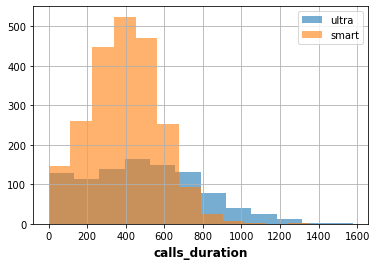

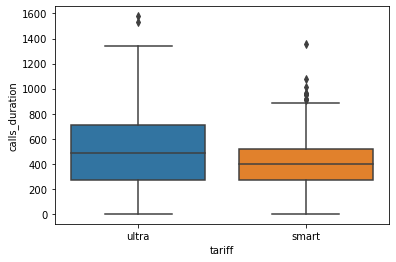

In [28]:
hist_tariff('calls_duration') #выводим гистограмму и боксплот для столбца 'calls_duration'

Продолжительность вызовов у абонентов тарифа 'smart' и 'ultra' отличается. Большинство клиентов тарифа 'smart' тратят в среднем месяц по 400 мин, тогда как для абонентов тарифа 'ultra' продолжительность звонков чуть больше примерно 500 мин. Длительность ежемесячных вызовов для абонентов тарифа 'smart' редко превышает 900 мин, а для абонентов тарифа 'ultra' обычно не превышает 1300 мин. 

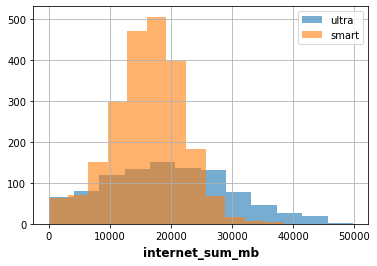

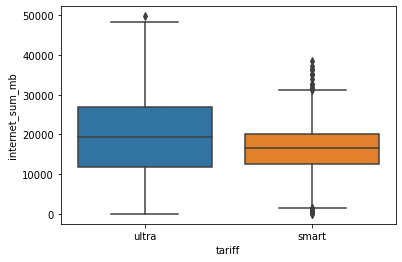

In [29]:
hist_tariff('internet_sum_mb') #выводим гистограмму и боксплот для столбца 'internet_sum_mb'

Объем интернет-трафика у абонентов тарифа 'smart' и 'ultra' отличается. В среднем абоненты тарифа 'smart' тратят в месяц по 16000 мегабайт, тогда как для абоненты тарифа 'ultra' тратят чуть больше примерно 19000 мегабайт. Ежемесячный объем интернет - трафика для абонентов тарифа 'smart' редко превышает 30000 мегабайт, а для абонентов тарифа 'ultra' обычно не превышает 45000 мегабайт.

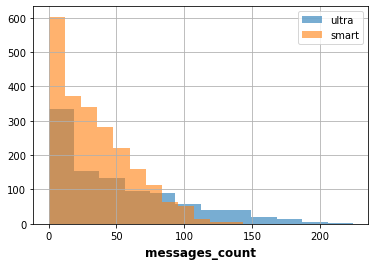

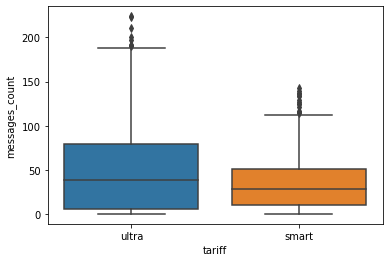

In [30]:
hist_tariff('messages_count') #выводим гистограмму и боксплот для столбца 'messages_count'

В среднем абоненты тарифа 'smart' в месяц отправляют по 33 сообщения, тогда как абоненты тарифа 'ultra' больше примерно 49 сообщений. Ежемесячно абоненты тарифа 'smart' отправляют до 120 сообщений, а абоненты тарифа 'ultra' обычно не более 180.

Рассмотрим как меняются траты пользователей тарифов 'smart' и 'ultra' в зависимости от месяца года. Рассчитаем медианные значения продолжительности вызовов, объема интернет-трафика, количества сообщений и прибыли для каждого месяца по каждому тарифу. Полученные данные запишем в переменную user_info_pivot_month.

In [31]:
user_info_pivot_month = user_info.pivot_table(index=['tariff', 'month'], values=['calls_duration', 'messages_count', 'internet_sum_mb', 'profit'], aggfunc={'calls_duration': [np.median], 'internet_sum_mb': [np.median], 'messages_count': [np.median], 'profit': [np.median]})
user_info_pivot_month.columns = ['calls_duration_median', 'internet_sum_mb_median', 'messages_count_median', 'profit_median']
user_info_pivot_month

calls_duration_median  internet_sum_mb_median  \
tariff month                                                  
smart  1                    156.220                7096.185   
       2                    242.905               12553.710   
       3                    386.360               15670.250   
       4                    349.420               14087.650   
       5                    407.420               16323.940   
       6                    378.185               16077.440   
       7                    388.180               15925.290   
       8                    408.700               16833.490   
       9                    410.170               16028.435   
       10                   404.505               17225.335   
       11                   403.875               17013.800   
       12                   445.830               17713.510   
ultra  1                    359.650               14791.370   
       2                    156.550                7327.125   
       3                    380.100               17495.180   
       4                    427.400               16645.780   
       5                    485.230               18696.430   
       6                    451.330               19480.205   
       7                    510.940               20014.220   
       8                    471.480               18932.620   
       9                    494.530               19656.300   
       10                   502.660               20338.150   
       11                   514.675               18377.790   
       12                   549.450               21972.630   

              messages_count_median  profit_median  
tariff month                                        
smart  1                       15.0        550.000  
       2                       20.0        550.000  
       3                       23.0        819.000  
       4                       28.0        584.500  
       5                       30.0        950.000  
       6                       28.0        945.285  
       7                       29.0        950.000  
       8                       27.0        998.000  
       9                       30.0        950.000  
       10                      30.0       1150.000  
       11                      28.0       1150.000  
       12                      29.0       1246.000  
ultra  1                       32.0       1950.000  
       2                        5.5       1950.000  
       3                       20.0       1950.000  
       4                       17.0       1950.000  
       5                       25.0       1950.000  
       6                       27.5       1950.000  
       7                       38.0       1950.000  
       8                       40.0       1950.000  
       9                       43.0       1950.000  
       10                      49.0       1950.000  
       11                      43.0       1950.000  
       12                      51.0       1950.000

Для более наглядного отображения информации представим полученные в таблице данные в виде столбчатой диаграммы.

In [32]:
#напишем функцию вывода столбчатой диаграммы по каждому столбцу для тарифов 'smart' и 'ultra'
def plot_month(col):
    ax=user_info_pivot_month.query('tariff == "ultra"').plot(y=col, grid=True,figsize=(13,6),kind='bar',label='ultra', alpha=0.2)
    user_info_pivot_month.query('tariff == "smart"').plot(y=col, grid=True,figsize=(13,6),kind='bar',label='smart',alpha=0.6, ax=ax)
    plt.show()

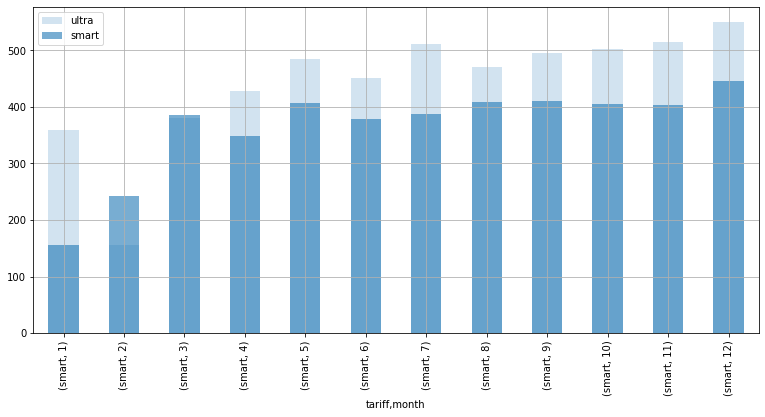

In [33]:
plot_month('calls_duration_median') #применяем функцию к столбцу 'calls_duration_median'

Больше всего медианная продолжительность вызовов и для абонентов тарифа 'smart', и для абоннентов тарифа 'ultra' приходится на декабрь. С апреля по ноябрь длительность вызовов у пользователи обоих тарифов примерно одинакова.  В январе пользователи тарифа 'smart' тратили существенно меньше минут разговора, тогда как заметный спад в продолжительности вызовов у абонентов тарифа 'ultra' приходится на февраль.

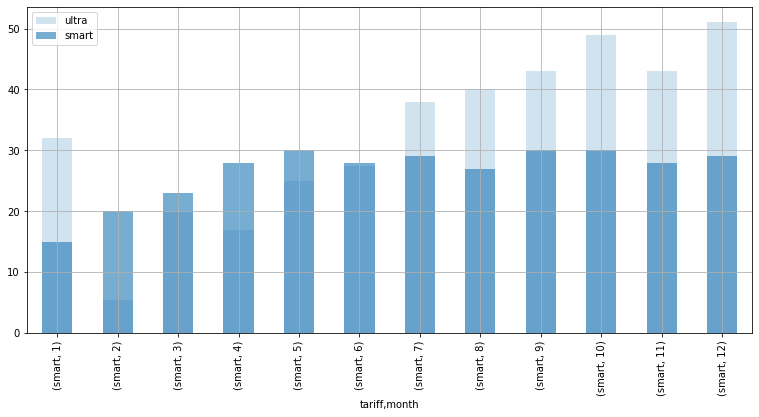

In [34]:
plot_month('messages_count_median') #применяем функцию к столбцу 'messages_count_median'

Количество сообщений, отправляемых абонентами тарифа 'smart' в течение года примерно одинаково, некоторый спад отмечается в январе и феврале. Для абонентов тарифа 'ultra' характерно большее колебание количества отправленных сообщений. Максимальное числа сообщений абоненты  тарифа 'ultra' отправляют в декабре, а наименьшее количество в феврале.

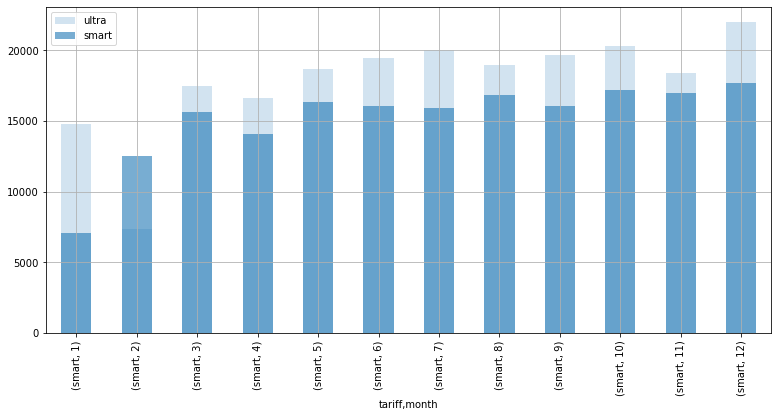

In [35]:
plot_month('internet_sum_mb_median') #применяем функцию к столбцу 'internet_sum_mb_median'

Объем интернет трафика для абонентов обоих тарифов с марта по ноябрь находится примерно на одном уровне, и не сильно отличается друг от друга, объем интернет трафика находится в диапазоне 15000 - 20000 мегабайт. Незначительный рост отмечается у абонентов тарифа 'ultra' в декабре. Заметный спад отмечен в январе у абонентов тарифа 'smart' и в феврале у абонентов тарифа 'ultra'.

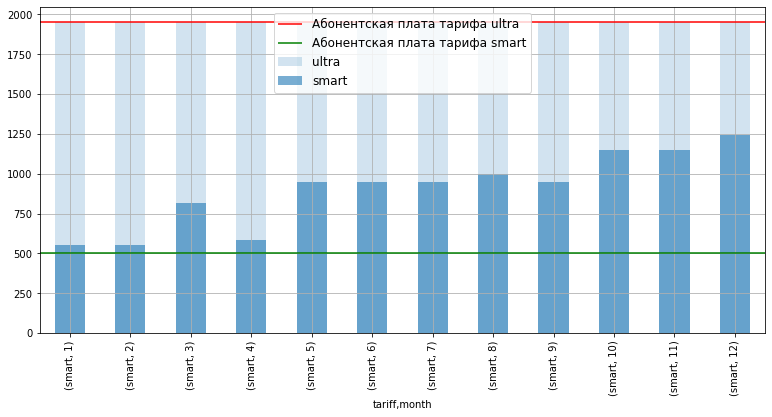

In [36]:
#Построим столбчатую диаграмму для столбца 'profit_median', отметим уровень абонентской платы для каждого тарифа

ax=user_info_pivot_month.query('tariff == "ultra"').plot(y='profit_median',grid=True,figsize=(13,6),kind='bar',label='ultra', alpha=0.2)
user_info_pivot_month.query('tariff == "smart"').plot(y='profit_median',grid=True,figsize=(13,6),kind='bar',label='smart',alpha=0.6, ax=ax)
ax.hlines(1950, -1, 12, color='red', label='Абонентская плата тарифа ultra')
ax.hlines(500, -1, 12, color='green', label='Абонентская плата тарифа smart')
ax.legend(fontsize=12)
plt.show()

Столбчатая диаграмма по столбцу `profit_median` показывает, что в течение года средняя прибыль от абонентов тарифа 'ultra' одинакова и не превышает абонентской платы по данному тарифу. Для абонентов тарифа 'smart' прибыль ежемесячно превышает абонентскую плату, в марте и с мая по декабрь почти в два раза.

Для абонентов тарифа 'ultra' отметили снижение объема потребляемых услуг в феврале. Это характерно для всех позиций: продолжительности вызовов, количества сообщений и объеме использованного интернет-трафика.

Рассчитаем суммарную прибыль по каждому тарифу.

In [37]:
user_info.pivot_table(index='tariff', values='profit', aggfunc='sum')

,profit
tariff,
smart,2802209.02
ultra,2039100.00


In [38]:
#таблица с медианными данными используемых услуг, а также прибыль по каждому пользователю, может пригодиться для исследования поведения пользователей, которые приносят максимальную прибыль
user_info_pivot_id = user_info.pivot_table(index=['tariff', 'user_id'], values=['calls_duration', 'messages_count', 'internet_sum_mb', 'profit'], aggfunc={'calls_duration': [np.median], 'internet_sum_mb': [np.median], 'messages_count': [np.median], 'profit': [np.median]})
user_info_pivot_id.columns = ['calls_duration_median', 'internet_sum_mb_median', 'messages_count_median', 'profit_median']
user_info_pivot_id

calls_duration_median  internet_sum_mb_median  \
tariff user_id                                                  
smart  1001                   399.730               16233.000   
       1002                   204.750               17580.100   
       1005                   562.525                7833.230   
       1006                   332.320               15521.530   
       1007                   447.990               14427.330   
...                               ...                     ...   
ultra  1476                   466.140               15983.380   
       1485                   547.220               23422.760   
       1491                   502.560               17828.380   
       1493                   350.505               27209.685   
       1495                   892.650               29363.000   

                messages_count_median  profit_median  
tariff user_id                                        
smart  1001                       0.0        850.000  
       1002                      11.0       1150.000  
       1005                      49.0        743.575  
       1006                       0.0        750.000  
       1007                      26.0        890.040  
...                               ...            ...  
ultra  1476                       5.0       1950.000  
       1485                     155.0       1950.000  
       1491                      52.0       1950.000  
       1493                      47.0       2850.000  
       1495                      82.0       1950.000  

[498 rows x 4 columns]

**Выводы:**

Мы построили  сводные таблицы с расчетом среднего, стандартного отклонения и дисперсии, для данных о продолжительности вызовов, количестве сообщений, объеме потраченного интернет-трафика и прибыли по каждому из тарифов. 
Из таблицы видно, что для пользователей тарифа 'ultra' характерно большее стандартное отклонение и большая дисперсия для продолжительности вызовов, количества отправленных сообщений и объема интернет-трафика, тогда как для значений прибыли наоборот большее стандартное отклонение и дисперсия у пользователей тарифа 'smart'. Средняя продолжительность вызовов, объем интернет трафика и количесвто отправленных сообщений у пользователей тарифа 'ultra' больше чем у пользователей тарифа 'smart'.

Построили гистограммы по столбцам `calls_duration`, `internet_sum_mb`, `messages_count`, `profit`. На основе гистограмм сделали выводы, что для пользователей тарифа 'ultra' характерен больший размах использования всех услуг, тогда как для пользователей тарифа 'smart' характерно присутсвие большого количества выбросов.
Построили столбчатые диаграммы распределения использования услуг по месяцам для каждого тарифа. Рассмотрели как меняется объем используемых услуг в зависимости от месяца.  
Пользователи тарифа **'smart'** принесли **2 802 209 рублей** прибыли, а пользователи тарифа **'ultra' - 2 039 100 рублей**.


## Проверка гипотез

Проверим следующие гипотезы:

-	средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
-	средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Рассмотрим распределение прибыли для каждого тарифа. Воспользуемся функцией hist_tariff().

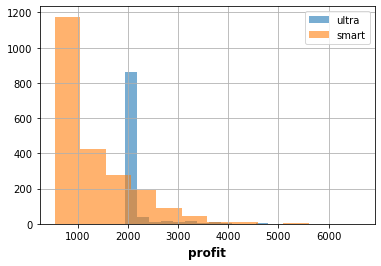

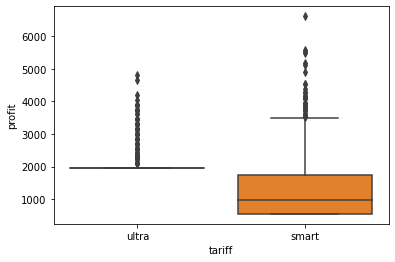

In [39]:
hist_tariff('profit') #выводим гистограмму и боксплот для столбца 'profit'

Прибыль от тарифа 'ultra' идет в основном от абонентской платы - 1950 рублей, пользователи данного тарифа редко превышает включенный в тариф лимит продолжительности звонков, интернет трафика и количества сообщений. Расходы пользователей тарифа 'ultra' обычно не превышают 2000 рублей. В среднем пользователи тарифа 'smart' ежемесячно тратят на связь по 1200 рублей, расходы пользователей тарифа 'smart' обычно не превышают 3500 рублей.

Проверим предположение о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

Для этого сформулируем **нулевую гипотезу**:
H0  — средняя выручка пользователей тарифа «Ультра» равна средней выручке пользователей тарифа «Смарт».


**Альтернативная гипотеза**:
H1  — средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.


**Уровень статистической значимости** примем более строгий:
α=1%

Для проверки гипотезы будем использовать метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам **scipy.stats.ttest_ind (array1, array2, equal_var)**.
Проверим условия применимости данного t-теста: 
1. Генеральные совокупности не зависят друг от друга (пользователи разных тарифов никак не влияют друг на друга).
2. Выборочные средние нормально распределены (объем выборок достаточно большой для подтверждения данного условия).
3. Дисперсии рассматриваемых генеральных совокупностей не равны (для параметра equal_var укажем значение False).

В случае, если полученный p-уровень значимости будет меньше принятого уровня статистической значимости, то отвергнем нулевую гипотезу, в ином случаем отвергнуть нулевую гипотезу не получится.

In [40]:
ultra = user_info.query('tariff == "ultra"')['profit'] #прибыль пользователей тарифа 'ultra'
smart = user_info.query('tariff == "smart"')['profit'] #прибыль пользователей тарифа 'smart'

alpha = .01 #уровень статистической значимости

results = st.ttest_ind(
    ultra, 
    smart, 
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.023984607909521e-274
Отвергаем нулевую гипотезу


Данные предоставляют достаточное основание — для выбранного уровня значимости — отвергнуть нулевую гипотезу. Значит, можно сделать вывод, что средняя выручка пользователей тарифа «Ультра» отличается от средней выручки пользователей тарифа «Смарт».

Проверим предположение о том, что средняя выручка абонентов из Москвы отличается от выручки абонентов из других регионов.

Для этого сформулируем **нулевую гипотезу**:
H0  — средняя выручка абонентов из Москвы равна средней выручке абонентов других регионов.


**Альтернативная гипотеза**:
H1  — средняя выручка абонентов из Москвы и других регионов различаются.


**Уровень статистической значимости** примем более строгий:
α=1%

Для проверки гипотезы будем использовать метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам **scipy.stats.ttest_ind (array1, array2, equal_var)**.
Проверим условия применимости данного t-теста: 
1. Генеральные совокупности не зависят друг от друга (абоненты из разных городов никак не влияют друг на друга).
2. Выборочные средние нормально распределены (объем выборок достаточно большой для подтверждения данного условия).
3. Дисперсии рассматриваемых генеральных совокупностей не равны (для параметра equal_var укажем значение False).

В случае, если полученный p-уровень значимости будет меньше принятого уровня статистической значимости, то отвергнем нулевую гипотезу, в ином случаем отвергнуть нулевую гипотезу не получится.

In [41]:
moscow = user_info.query('city == "Москва"')['profit'] #прибыль абонентов из Москвы
other = user_info.query('city != "Москва"')['profit'] #прибыль абонентов из других регионов

alpha = .01 #уровень статистической значимости

results = st.ttest_ind(
    moscow, 
    other, 
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.4641190016496177
Не получилось отвергнуть нулевую гипотезу


Нулевую гипотезу отвергнуть не получилось, значит можно сделать вывод о том, что средняя выручка абонентов из Москвы равна средней выручке абонентов других регионов.

**Выводы:**
Статитистическая проверка гипотез показала, что средняя выручка пользователей тарифа «Ультра» отличается от средней выручки пользователей тарифа «Смарт», а также, что средняя выручка абонентов из Москвы равна средней выручке абонентов других регионов.

## Итоги исследования

Обнаружены пропущенные значения в столбце `churn_date`,   таблицы users,  но заполнение их не потребовалось, т.к. согласно документации, если значение пропущено, то тариф ещё действовал на момент выгрузки данных.
В таблице internet  удалили дублирующий индекс столбец `Unnamed: 0`,  а  также обнаружили нулевые значения в столбцах `mb_used` и `calls duration` (исправлять не требуется).
В ходе предобработки данных проверили все таблицы на наличие явных дубликатов строк – их не обнаружено. Привели столбцы `churn_date`, `reg_date` таблицы users, `call_date` таблицы calls, `message_date` таблицы messages и `session_date` таблицы internet к типу datetime.

Округлили продолжительность разговора для каждого пользователя в соответствии с документацией к тарифу.
Рассчитали количество использованного интернет трафика для каждого пользователя в Гб.
Объединили в сводной таблице информацию о длительности звонков, количестве сообщений, израсходованном интернете, а также о городе и тарифе для каждого пользователя за каждый месяц.
Заменили пропущенные значения, получившиеся при объединении таблиц на "0".
Рассчитали прибыль от каждого клиента и добавили значение в сводную таблицу. 
Рассчитали и представили в сводной таблице данные: среднее, стандартное отклонение и дисперсию по столбцам `calls_duration`, `messages_count`, `internet_sum_mb`, `profit` по каждому тарифу. 
Построили гистограммы по столбцам `calls_duration`, `internet_sum_mb`, `messages_count`, рассмотрели распределение продолжительности звонков, количества сообщений, объем интернет-трафика  для общей таблицы, по каждому из тарифов. 

Продолжительность вызовов, объем интернет-трафика, количество сообщений у абонентов тарифа 'smart' и 'ultra' отличается. 

Тариф **'smart'** используют **2229** пользователей.
Для пользователей тарифа  'smart' характерно:
- Средняя продолжительность вызовов в месяц - 400 мин (редко превышает 900 мин);
- Средний объем интернет – трафика в месяц - 16000 мегабайт (редко превышает 30000 мегабайт);
- Среднее количество отправляемых сообщений в месяц -  33 (до 120 сообщений);
- Средняя прибыль составляет **1257 рублей**;
- Максимальная прибыль составляет **6613 рублей**;
- Суммарная прибыль за год **2 802 209 рублей**
- В среднем пользователи тарифа 'smart' ежемесячно тратят на связь по 1200 рублей, расходы пользователей тарифа 'smart' обычно не превышают 3500 рублей.

Тариф **'ultra'** испольуют **985** пользователей.
Для пользователей тарифа  ' ultra ' характерно:
- Средняя продолжительность вызовов в месяц - 500 мин (редко превышает 1300 мин);
- Средний объем интернет – трафика в месяц - 19000 мегабайт (редко превышает 45000 мегабайт);
- Среднее количество отправляемых сообщений в месяц -  49 (до 180 сообщений);
- Средняя прибыль составляет **2070 рублей**;
- Максимальная прибыль составляет **4800 рублей**;
- Суммарная прибыль за год **2 039 100 рублей**
- Прибыль от тарифа 'ultra' идет в основном от абонентской платы - 1950 рублей, пользователи данного тарифа редко превышает включенный в тариф лимит продолжительности звонков, интернет трафика и количества сообщений. Расходы пользователей тарифа 'ultra' обычно не превышают 2000 рублей.


Для пользователей тарифа 'ultra' характерно большее стандартное отклонение и большая дисперсия продолжительности вызовов, количества отправленных сообщений и объема интернет-трафика, тогда как для значений прибыли наоборот большее стандартное отклонение и дисперсия у пользователей тарифа 'smart'. Средняя продолжительность вызовов, объем интернет трафика и количество отправленных сообщений у пользователей тарифа 'ultra' больше чем у пользователей тарифа 'smart'.
Построили гистограммы по столбцам `calls_duration`, `internet_sum_mb`, `messages_count`, `profit`. На основе гистограмм сделали выводы, что для пользователей тарифа 'ultra' характерен больший размах использования всех услуг, тогда как для пользователей тарифа 'smart' характерно присутствие большого количества выбросов. 

Построили столбчатые диаграммы распределения использования услуг по месяцам для каждого тарифа.
 Рассмотрели, как меняется объем используемых услуг в зависимости от месяца.
Больше всего медианная продолжительность вызовов и для абонентов тарифа 'smart', и для абонентов тарифа 'ultra' приходится на декабрь. С апреля по ноябрь длительность вызовов у пользователей обоих тарифов примерно одинакова. В январе пользователи тарифа 'smart' тратили существенно меньше минут разговора, тогда как заметный спад в продолжительности вызовов у абонентов тарифа 'ultra' приходится на февраль.
Количество сообщений, отправляемых абонентами тарифа 'smart' в течение года примерно одинаково, некоторый спад отмечается в январе и феврале. Для абонентов тарифа 'ultra' характерно большее колебание количества отправленных сообщений. Максимальное числа сообщений абоненты тарифа 'ultra' отправляют в декабре, а наименьшее количество в феврале.
Объем интернет трафика для абонентов обоих тарифов с марта по ноябрь находится примерно на одном уровне, и не сильно отличается друг от друга, объем интернет трафика находится в диапазоне 15000 - 20000 мегабайт. Незначительный рост отмечается у абонентов тарифа 'ultra' в декабре. Заметный спад отмечен в январе у абонентов тарифа 'smart' и в феврале у абонентов тарифа 'ultra'.
Для абонентов тарифа 'ultra' отметили снижение объема потребляемых услуг в феврале. Это характерно для всех позиций: продолжительности вызовов, количества сообщений и объеме использованного интернет-трафика.

Столбчатая диаграмма по столбцу `profit_median` показывает, что в течение года средняя прибыль от абонентов тарифа 'ultra' одинакова и не превышает абонентской платы по данному тарифу. Для абонентов тарифа 'smart' прибыль ежемесячно превышает абонентскую плату, в марте и с мая по декабрь почти в два раза.


Проверили следующие гипотезы с использованием t-теста:
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются (гипотеза не подтвердилась, сделали вывод, что средняя выручка пользователей тарифа «Ультра» отличается от средней выручки пользователей тарифа «Смарт»);
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов (гипотеза подтвердилась, средняя выручка абонентов из Москвы равна средней выручке абонентов других регионов).
